In [2]:
import numpy as np
import pandas as pd
from confusion_matrix_helper import make_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [3]:
data = pd.read_csv("parkinsons.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
Y = data["status"]
X = data.drop(columns=["status","name"])
accuracies={}
precisions={}
X.columns


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
with open("pickle_files/plain/scaler.pkl","wb") as file:
    pickle.dump(scaler,file)
X_train = pd.DataFrame(scaler.transform(X_train),columns=[x for x in X_train.columns])
X_test = pd.DataFrame(scaler.transform(X_test),columns=[x for x in X_test.columns])

# Support Vector Machine

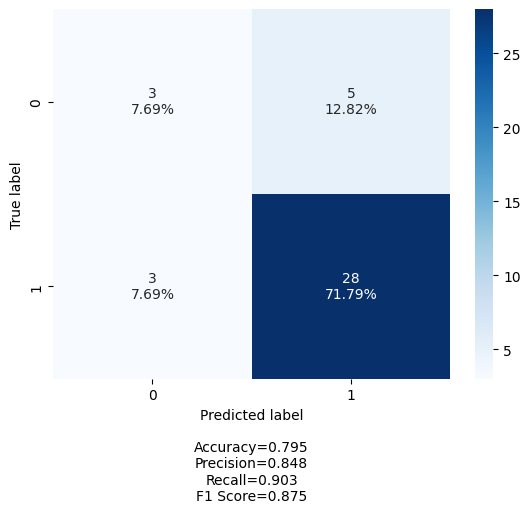

In [38]:
svc = svm.SVC()
svc.fit(X_train,Y_train)
with open("pickle_files/feature_selection/svm.model","wb") as file:
    pickle.dump(svc,file)
Y_pred = svc.predict(X_test)
accuracies["SVM"]=accuracy_score(Y_test,Y_pred)
precisions["SVM"]=precision_score(Y_test,Y_pred)
cf = confusion_matrix(Y_test,Y_pred)
make_confusion_matrix(cf)

# Logistic Regressor

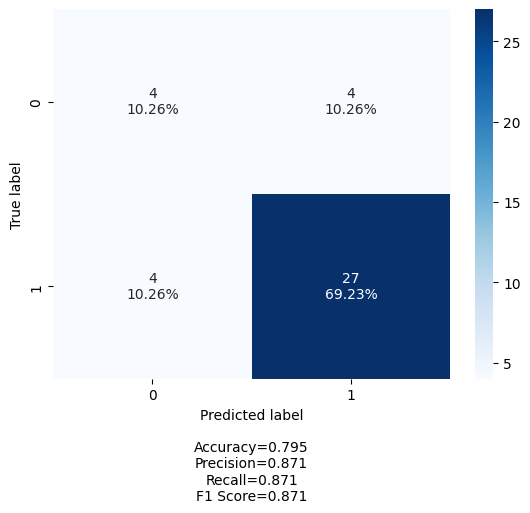

In [39]:
lrc = LogisticRegression(random_state=0)
lrc.fit(X_train,Y_train)
with open("pickle_files/feature_selection/lrc.model","wb") as file:
    pickle.dump(lrc,file)
Y_pred = lrc.predict(X_test)
accuracies["LRC"]=accuracy_score(Y_test,Y_pred)
precisions["LRC"]=precision_score(Y_test,Y_pred)
cf = confusion_matrix(Y_test,Y_pred)
make_confusion_matrix(cf)

# Random Forest

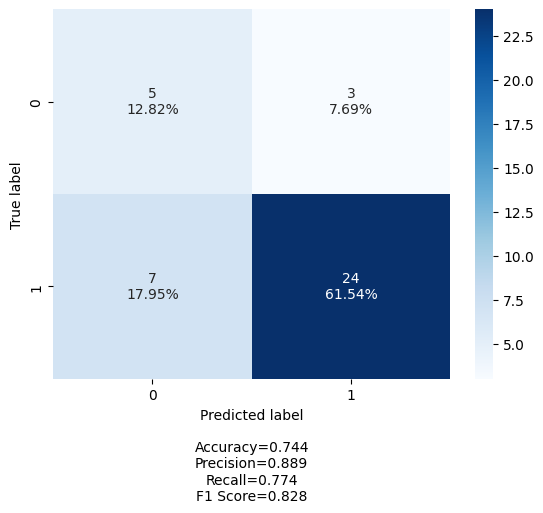

In [40]:
rfc = RandomForestClassifier(n_estimators= 10, criterion="log_loss")
rfc.fit(X_train,Y_train)
with open("pickle_files/feature_selection/rfc.model","wb") as file:
    pickle.dump(rfc,file)
Y_pred = rfc.predict(X_test)
accuracies["RFC"]=accuracy_score(Y_test,Y_pred)
precisions["RFC"]=precision_score(Y_test,Y_pred)
cf = confusion_matrix(Y_test,Y_pred)
make_confusion_matrix(cf)

# Decision Trees

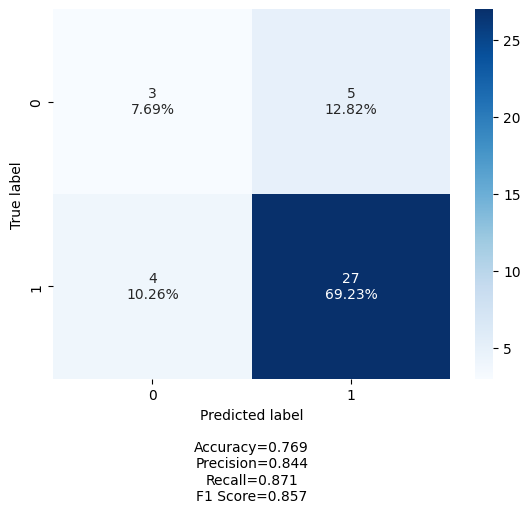

In [41]:
dtc = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 0)
dtc.fit(X_train, Y_train)
with open("pickle_files/feature_selection/dtc.model","wb") as file:
    pickle.dump(dtc,file)
Y_pred = dtc.predict(X_test)
accuracies["DTC"]=accuracy_score(Y_test,Y_pred)
precisions["DTC"]=precision_score(Y_test,Y_pred)
cf = confusion_matrix(Y_test,Y_pred)
make_confusion_matrix(cf)

# Metrics

In [42]:
accuracies,precisions

({'SVM': 0.7948717948717948,
  'LRC': 0.7948717948717948,
  'RFC': 0.7435897435897436,
  'DTC': 0.7692307692307693},
 {'SVM': 0.8484848484848485,
  'LRC': 0.8709677419354839,
  'RFC': 0.8888888888888888,
  'DTC': 0.84375})